In [ ]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


In [ ]:
dates = []
prices = []

In [ ]:
def data(filename):
    i = 0
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        # to skip column names
        next(csvFileReader)
        for row in csvFileReader:
            #dates.append(int(row[0].split('/')[0]))
            dates.append(i)
            #dates.append(str(row[0]))
            prices.append(float(row[1]))
            i+=1
    return

In [ ]:
def predict(dates, prices):
    # converting to matrix of n X 1
    dates = np.reshape(dates,(len(dates), 1)) 
    # defining the support vector regression models
    lin = SVR(kernel= 'linear', C= 1e3)
    poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
    rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)

    # fitting the data points in the models
    rbf.fit(dates, prices) 
    lin.fit(dates, prices)
    poly.fit(dates, prices)

     # plotting the initial datapoints 
    plt.scatter(dates, prices, color= 'black', label= 'Data')
    # plotting the line made by the RBF kernel
    plt.plot(dates, rbf.predict(dates), color= 'red', label= 'RBF model') 
    # plotting the line made by linear kernel
    plt.plot(dates,lin.predict(dates), color= 'green', label= 'Linear model') 
    # plotting the line made by polynomial kernel
    plt.plot(dates,poly.predict(dates), color= 'blue', label= 'Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    return 

In [ ]:
data('gold-360.csv') 

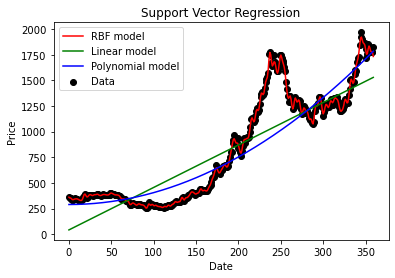

In [ ]:
predict(dates, prices)